In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['wisconsin_breast_cancer.csv']


Author: Jeffrey Jose, ID Number: 1313512 <br/>
Author: Ryan Hatherill, ID Number: 1679779


In [2]:
data = pd.read_csv('../input/wisconsin_breast_cancer.csv') #read the values into variable 'data'
data = data.fillna(0) #Replace all NaN values with 0.0
data.head() #Show the first 5 rows of the dataset

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [3]:
data.info() #Displays key information about the data type and the columns within the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id           699 non-null int64
thickness    699 non-null int64
size         699 non-null int64
shape        699 non-null int64
adhesion     699 non-null int64
single       699 non-null int64
nuclei       699 non-null float64
chromatin    699 non-null int64
nucleoli     699 non-null int64
mitosis      699 non-null int64
class        699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


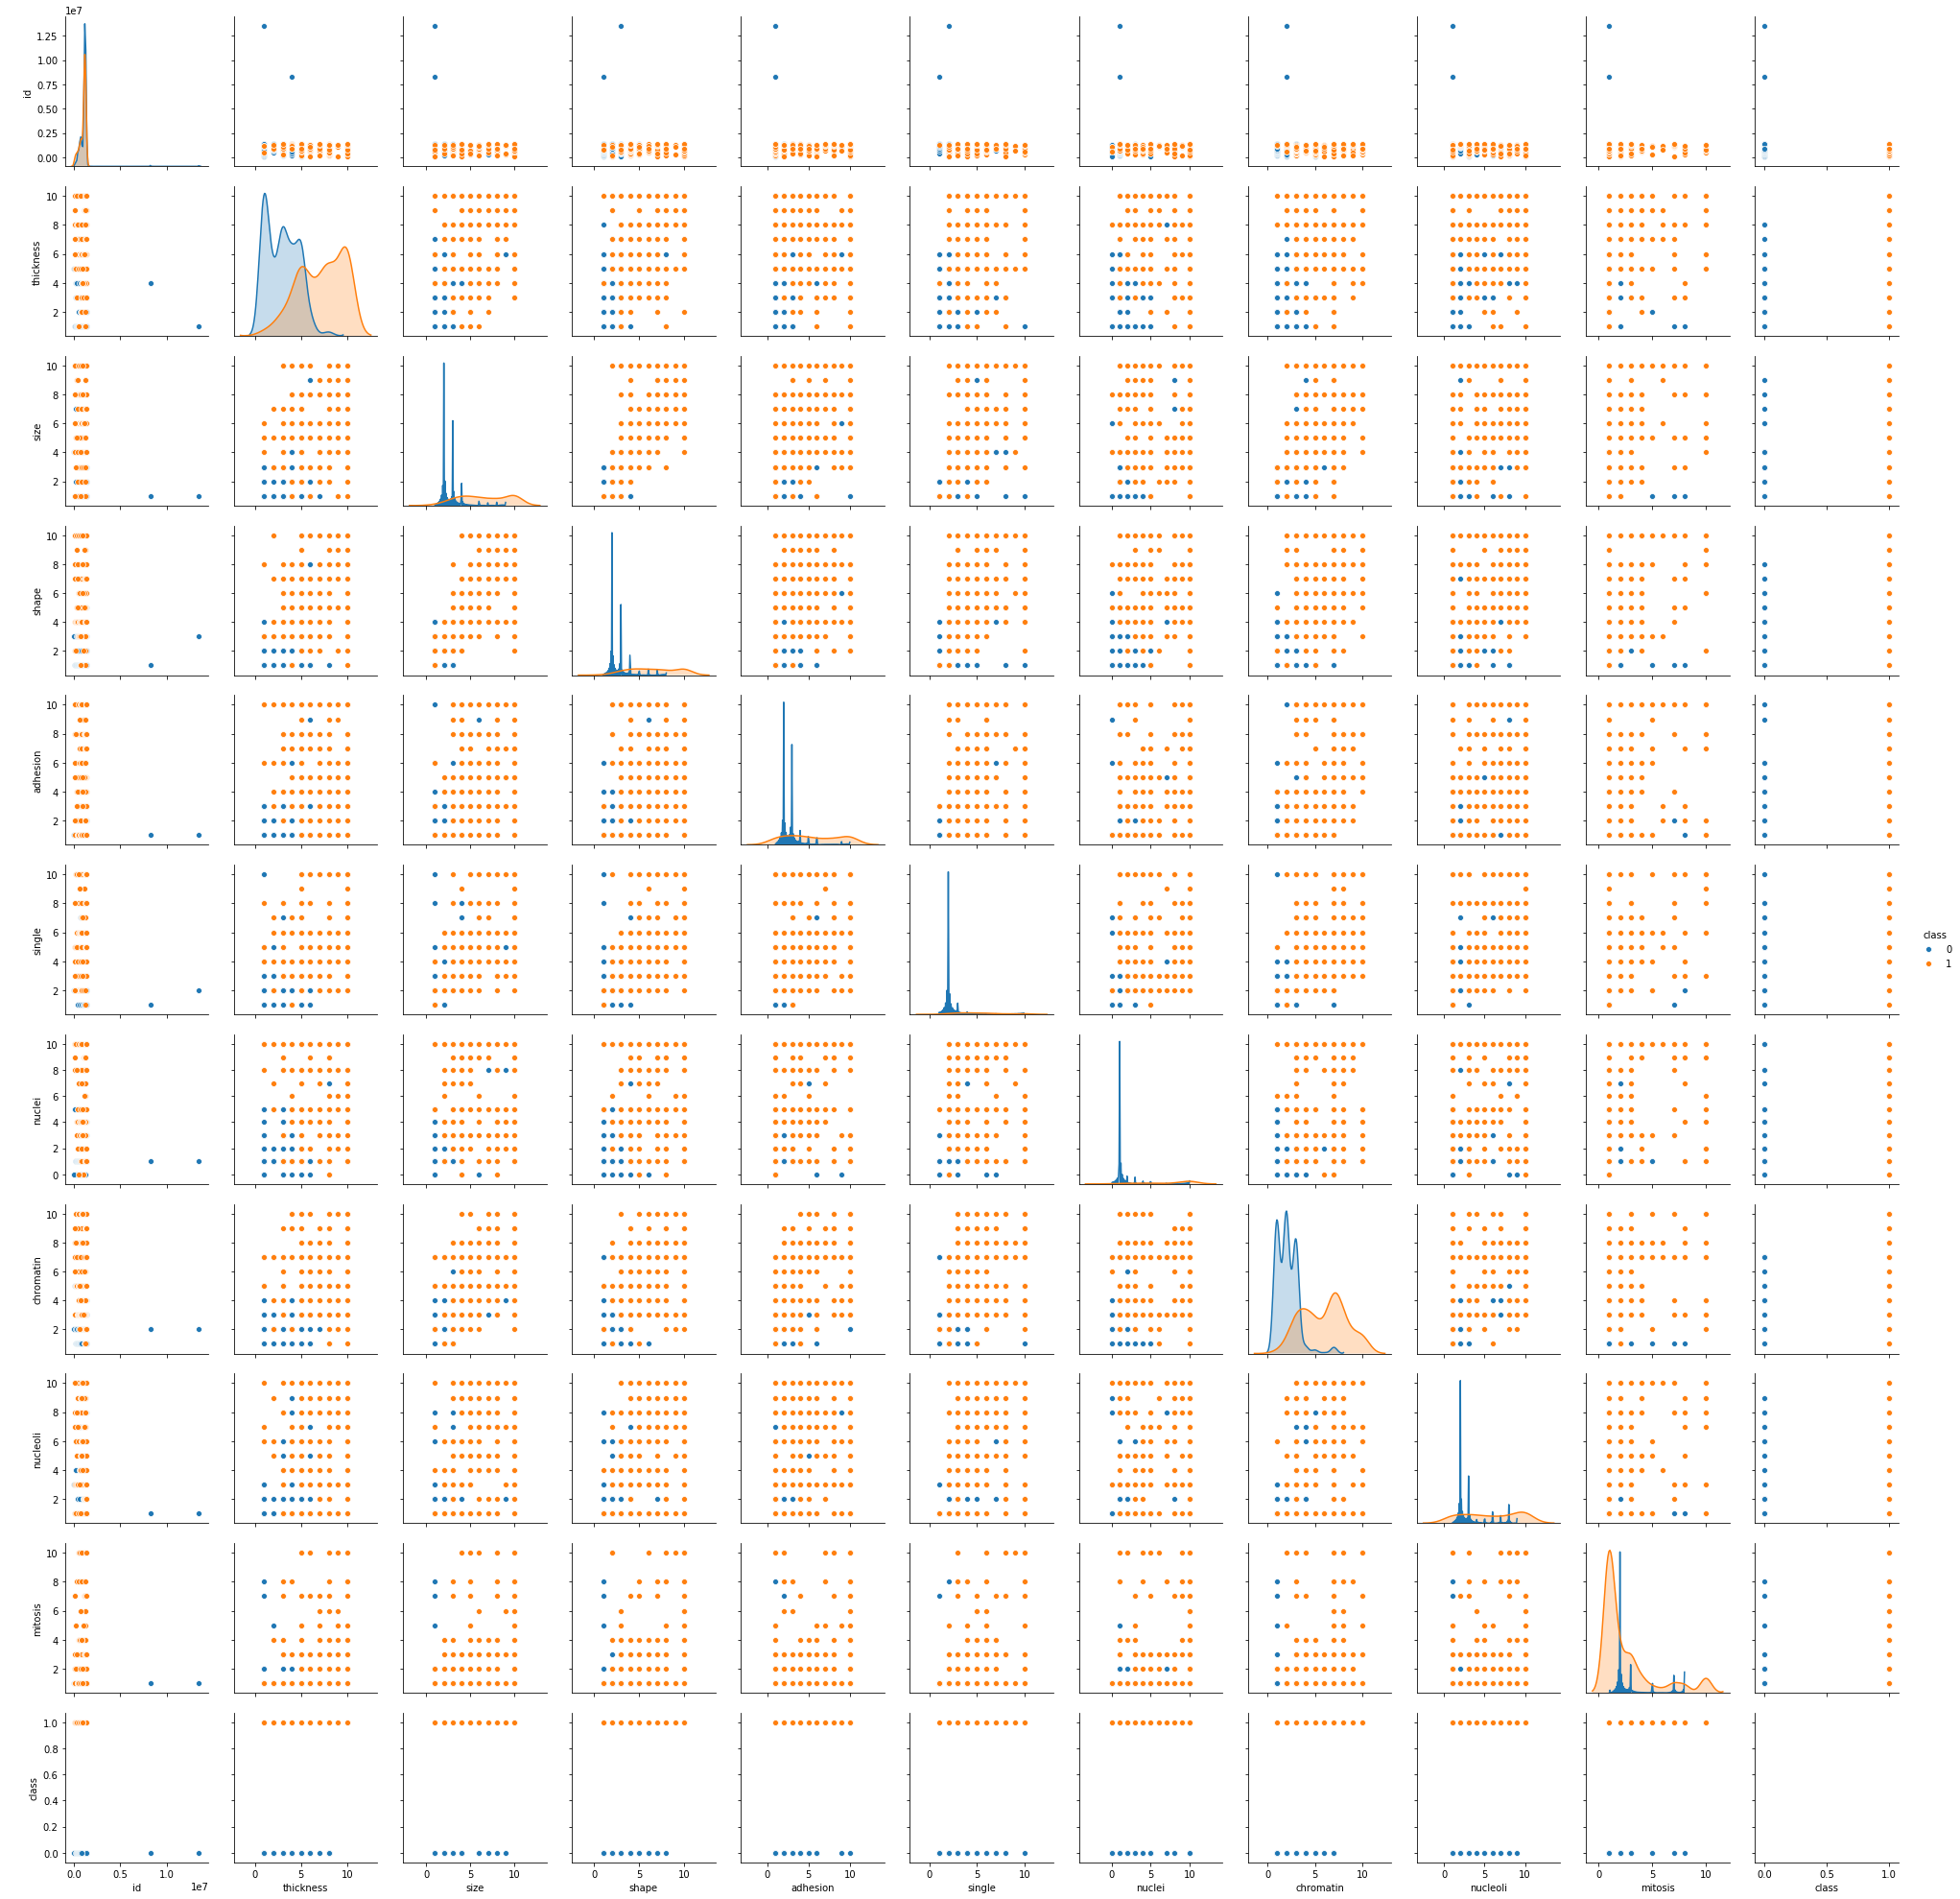

In [4]:
import seaborn as sns
#sns.pairplot(data=data, palette='Set2')
sns.pairplot(data, hue='class') #pairplot that is not partioned by class (benign or malignant)

In [5]:
from sklearn.model_selection import train_test_split

#iloc function is an array defined by [rows, columns]

x = data.iloc[:, 1:10] #set x to all columns except ID and Class
y = data.iloc[:, -1] #set y to the Class column

#train_split_test the x and y values with a test size of 20%
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2)

#print to see if the results are approximately what they should be
print(x_train.shape, y_train.shape) 

(559, 9) (559,)


In [6]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
#print( y_train[ :5]) debugging to see if the first 5 values of the y_train (debugging)

In [8]:
pred = model.predict(x_test)

#both the prints should show same numbers in same order
print(pred[:10])
print(y_test[:10])

[1 1 1 0 0 1 0 1 0 0]
427    1
330    1
152    1
521    0
139    0
386    1
133    0
359    1
202    0
394    0
Name: class, dtype: int64


In [9]:
from sklearn.metrics import confusion_matrix, classification_report


#confusion matrix is used to show the performance of the test model compared to the true values of the dataset
print(confusion_matrix(y_test, pred))

[[83  6]
 [ 0 51]]


In [10]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        89
           1       0.89      1.00      0.94        51

   micro avg       0.96      0.96      0.96       140
   macro avg       0.95      0.97      0.95       140
weighted avg       0.96      0.96      0.96       140



**4 Promising Features:**  *Thickness, Size, Shape and Chromatin seem to be the most promising features.*

In [11]:
from sklearn.model_selection import train_test_split

#iloc function is an array defined by [rows, columns]

xsub = data.iloc[:, [1,2,3,7]] #set x to all our promising features
y = data.iloc[:, -1] #set y to the Class column

#train_split_test the subx and y values with a test size of 20%
x_subtrain, x_subtest, y_train,y_test = train_test_split(xsub, y, test_size=0.2)

#print to see if the results are approximately what they should be
print(x_subtrain.shape, y_train.shape) 

(559, 4) (559,)


In [12]:
from sklearn.svm import SVC

submodel = SVC()
submodel.fit(x_subtrain, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
subpred = submodel.predict(x_subtest)

#both the prints should show same numbers in same order
print(subpred[:5])
print(y_test[:5])

[1 0 0 0 1]
110    0
208    0
363    0
375    0
357    1
Name: class, dtype: int64


In [14]:
from sklearn.metrics import confusion_matrix, classification_report


#confusion matrix is used to show the performance of the test model compared to the true values of the dataset
print(confusion_matrix(y_test, subpred))

[[96  3]
 [ 1 40]]


In [15]:
print(classification_report(y_test, subpred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        99
           1       0.93      0.98      0.95        41

   micro avg       0.97      0.97      0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



**Explanation**
*When running our test we saw that with our second classification report that our precision for predicting benign cases has dropped to 0.99 from 1.0 in the 1st model while our precision value for predicting malignant cases has dropped from 0.92 to 0.9. The recall value in the subtest has also dropped for banign cases going from 0.96 to 0.95, and from 1.0 to 0.98 for malignant cases. The f1-score for this run of the subtest also indicated a drop from 0.98 to 0.97 for banign cases and a drop from 0.96 to 0.94 in malignant cases. With the results gained from both runs of the two tests we saw a slightly negative trend caused within our subtest that shows weaker precision recall and f1-score, however the overall difference in our f1-score in our run is not large enough to make a 100% confident statement on which model is better. 

Note: The results vary with each run and upon 2nd run through we see a positive change in preciosion values within our subtest (only slightly), and identical f1-scores to the original test, indicating that there is not a large enough difference in values to give a clear indication as to which approach is better.*

In [16]:
x = data.iloc[:, 1:10] #set x to all columns except ID and Class
y = data.iloc[:, -1] #set y to the Class column

#train_split_test the x and y values with a test size of 20%
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2)

#print to see if the results are approximately what they should be
print(x_train.shape, y_train.shape)

(559, 9) (559,)


In [17]:
 

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
predn = neigh.predict(x_test)

#both the prints should show same numbers in same order
print(predn[:10])
print(y_test[:10])

[1 0 0 1 0 1 0 0 0 0]
340    1
383    0
125    0
41     1
536    0
191    1
637    0
682    0
389    0
313    0
Name: class, dtype: int64


In [19]:
print(confusion_matrix(y_test,predn))


[[98  4]
 [ 2 36]]


In [20]:
print(classification_report(y_test, predn))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       102
           1       0.90      0.95      0.92        38

   micro avg       0.96      0.96      0.96       140
   macro avg       0.94      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



In [21]:
x = data.iloc[:, 1:10] #set x to all columns except ID and Class
y = data.iloc[:, -1] #set y to the Class column

#train_split_test the x and y values with a test size of 20%
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2)

#print to see if the results are approximately what they should be
print(x_train.shape, y_train.shape)

(559, 9) (559,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
neigh2 = KNeighborsClassifier(n_neighbors = 5)
neigh2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
predn2 = neigh2.predict(x_test)

#both the prints should show same numbers in same order
print(predn2[:10])
print(y_test[:10])

[0 1 0 0 0 0 1 1 1 1]
82     0
155    1
16     0
92     0
219    0
273    1
386    1
381    1
175    1
52     1
Name: class, dtype: int64


In [24]:
print(confusion_matrix(y_test,predn2))

[[83  3]
 [ 7 47]]


In [25]:
print(classification_report(y_test, predn2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        86
           1       0.94      0.87      0.90        54

   micro avg       0.93      0.93      0.93       140
   macro avg       0.93      0.92      0.92       140
weighted avg       0.93      0.93      0.93       140



*After a full run through with all 4 methods (SVC train and subtrain, Knn classifier 1 and knn classifier 5) the f-1 scores for predicting the values seem to be highest using the SVC subtrain, however the difference in values is not largely different to the scores presented by the other 3 tests used and thus are not substantial enough to say which method is in fact more effective.*